# Market Model - Notebook 3
In this notebook various step by step implementations of the market model are proposed, in order to fully understand how the model is able to describe a variety of market patterns by adding different types of agents.

The mesa python library is used for this agent based modeling of markets and some sub-libraries like RandomActivation and DataCollector are imported which allow the model to activate agents in a random order and to collect data at each timestep.

The random library is also widely used in this model to add stocasticity in a controlled way by using a fixed seed and to make the initialization data more realistic (not all agents will start with the same exact wealth, but with some random differences).

In [1]:
import random
random.seed(42)

# load config, libraries and scripts
%run _00config.ipynb

# load built agents classes
%run _01agents.ipynb

# load built models classes
%run _02models.ipynb

## 3. Running the Models

### 3.1 Running Model with only Savers

In [2]:
N_agents = 10
Price = 10
Last_Price = Price
p_savers = 1.
savers_sentiment = 0.70

random.seed(42)
model = Market_Model_1(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26


In [3]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

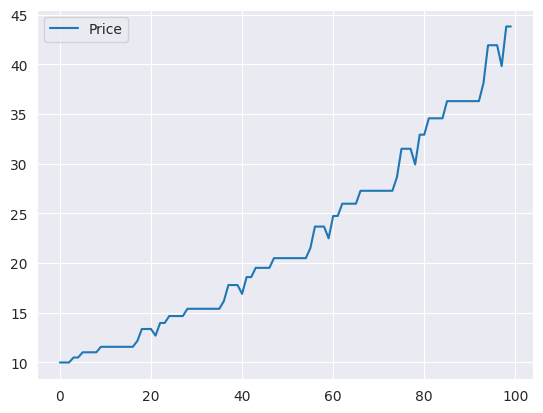

In [4]:
sns.set_style("darkgrid")
model_vars.plot();

It is observed that since savers are given a periodic behaviour of investing in the same position but with different frequencies then a trivial price trend pattern is a natural result in the direction of savers sentiment, which is a given model parameter.

### 3.2 Running Model with Savers and Random Traders

In [5]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.8
savers_sentiment = 0.70

random.seed(42)
model = Market_Model_2(N_agents, Price, p_savers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    model.step()

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
saver_8: 	 $ 939.77
saver_9: 	 $ 1040.26
saver_10: 	 $ 944.09
saver_11: 	 $ 955.64
saver_12: 	 $ 901.3
saver_13: 	 $ 931.93
saver_14: 	 $ 968.05
saver_15: 	 $ 943.06
saver_16: 	 $ 967.32
saver_17: 	 $ 975.99
saver_18: 	 $ 1069.5
saver_19: 	 $ 952.9
saver_20: 	 $ 1045.95
saver_21: 	 $ 924.97
saver_22: 	 $ 975.71
saver_23: 	 $ 958.64


In [6]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

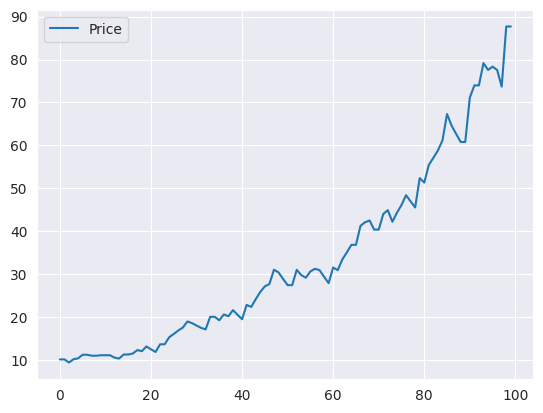

In [7]:
model_vars.plot();

In market with only savers and random traders one must pay attention to the amount of random traders and how much they can afford to exchange, this behaviour is controlled with self.order and p_savers.

Assuming that savers invest more than a random trader, which means that savers influence the price more (self.order for them is higher), it is observed that the price trend given by savers_sentiment persists but with some noise given by random tranders.

If self.order for savers is not high enough one observes that price trend is broken by random price oscillations and in some runs it may even invert the previous trend.

In [8]:
display(agent_vars)
#agent_vars.to_csv('../data/agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    saver_19       952.900000     sell      0
     rnd_trader_4          NaN      buy      1
     rnd_trader_3          NaN      buy      1
     saver_11       955.640000      buy      0
     saver_18      1069.500000     sell      0
...                        ...      ...    ...
100  saver_0        632.625435      buy      0
     saver_21       545.830511     sell      0
     rnd_trader_0          NaN     sell      1
     saver_14       823.571006      buy      0
     saver_13       650.522612      buy      0

[3000 rows x 3 columns]

### 3.3 Running Model with Savers, Random Traders and Followers

In [9]:
N_agents = 30
Price = 10
Last_Price = Price
p_savers = 0.6
p_followers = 0.2
savers_sentiment = 0.50

model = Market_Model_3(N_agents, Price, p_savers, p_followers, savers_sentiment)

N_steps = 100
for i in range(N_steps):
    random.seed(42)
    model.step()

saver_0: 	 $ 929.84
saver_1: 	 $ 1089.83
saver_2: 	 $ 1098.78
saver_3: 	 $ 1011.61
saver_4: 	 $ 1021.26
saver_5: 	 $ 1023.68
saver_6: 	 $ 1004.51
saver_7: 	 $ 1081.7
saver_8: 	 $ 1072.03
saver_9: 	 $ 961.08
saver_10: 	 $ 912.05
saver_11: 	 $ 919.85
saver_12: 	 $ 941.56
saver_13: 	 $ 952.93
saver_14: 	 $ 931.41
saver_15: 	 $ 1010.4
saver_16: 	 $ 900.54
saver_17: 	 $ 1037.87
follower_0: 	 $ 574.95	 close_thr: 7.3%
follower_1: 	 $ 624.83	 close_thr: 12.0%
follower_2: 	 $ 594.48	 close_thr: 11.9%
follower_3: 	 $ 650.87	 close_thr: 12.9%
follower_4: 	 $ 615.01	 close_thr: 11.6%
follower_5: 	 $ 652.04	 close_thr: 9.3%


In [10]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

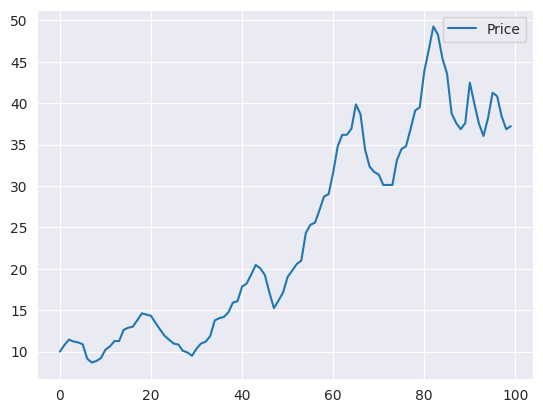

In [11]:
model_vars.plot();

In [12]:
display(agent_vars)
#agent_vars.to_csv('../data/agent_vars.csv')

Wealth Position  Order
Step AgentID                                  
1    saver_17      1037.870000     sell      0
     saver_7       1081.700000      buy      0
     follower_2     604.480000     null      0
     saver_4       1021.260000      buy      0
     saver_8       1072.030000      buy      0
...                        ...      ...    ...
100  rnd_trader_5          NaN     sell      1
     follower_3    1884.020689     sell      1
     follower_4    1959.212247     sell      1
     follower_5    2111.491592      buy      1
     saver_10       727.917187     sell      0

[3000 rows x 3 columns]

### 3.4 Running Model with Savers, Random Traders, Followers and Whales

In [13]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.20
p_followers = 0.10
p_whales = 0.05
savers_sentiment = 0.55
WLT = 10

model = Market_Model_4(N_agents, Price, p_savers, p_followers, p_whales, savers_sentiment, WLT)

N_steps = 500
for i in range(N_steps):
    model.step()

saver_0: 	 $ 1018.1
saver_1: 	 $ 905.96
saver_2: 	 $ 946.53
saver_3: 	 $ 905.31
saver_4: 	 $ 1043.2
saver_5: 	 $ 1008.99
saver_6: 	 $ 989.84
saver_7: 	 $ 1061.89
follower_0: 	 $ 631.06	 close_thr: 6.6%
follower_1: 	 $ 590.71	 close_thr: 7.8%
follower_2: 	 $ 565.84	 close_thr: 12.6%
follower_3: 	 $ 552.27	 close_thr: 8.8%
whale_0: 	 $ 9717.96	 close_thr: 96.9%	 WLT: 	10
whale_1: 	 $ 9529.04	 close_thr: 90.9%	 WLT: 	10


In [14]:
agent_vars = model.datacollector.get_agent_vars_dataframe()
model_vars = model.datacollector.get_model_vars_dataframe()

In [15]:
display(model_vars)

,Price
0,10.200000
1,8.874000
2,9.495180
3,9.685084
4,10.653592
...,...
495,25.286944
496,24.781205
497,26.268077
498,26.793439


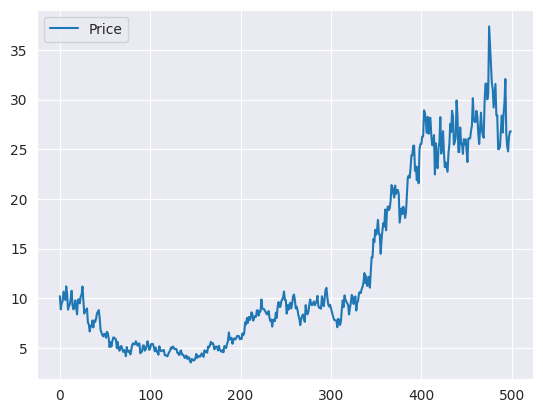

In [16]:
model_vars.plot();

In [19]:
model_vars.to_csv('../data/model_vars.csv')

In a market simulation, if the main objective is to observe a pretty realistic chart, then one should keep high the percentage of random traders.

Instead if one wants to capture the noiseless trend given by savers, followers and whales effects on price dynamics the percentage of random traders should be kept small.

## 3.5 Simulation Returns

In [18]:
display(model_vars['Price'])

0       9.600000
1       9.792000
2       9.596160
3       9.308275
4      10.611434
         ...    
495    41.837838
496    43.511351
497    44.381578
498    48.819736
499    50.284328
Name: Price, Length: 500, dtype: float64

In [19]:
# s_ret: simulated returns
s_ret = np.log(model_vars['Price'] / model_vars['Price'].shift(1)).dropna()

In [20]:
display(s_ret)

1      0.019803
2     -0.020203
3     -0.030459
4      0.131028
5      0.048790
         ...   
495    0.039221
496    0.039221
497    0.019803
498    0.095310
499    0.029559
Name: Price, Length: 499, dtype: float64

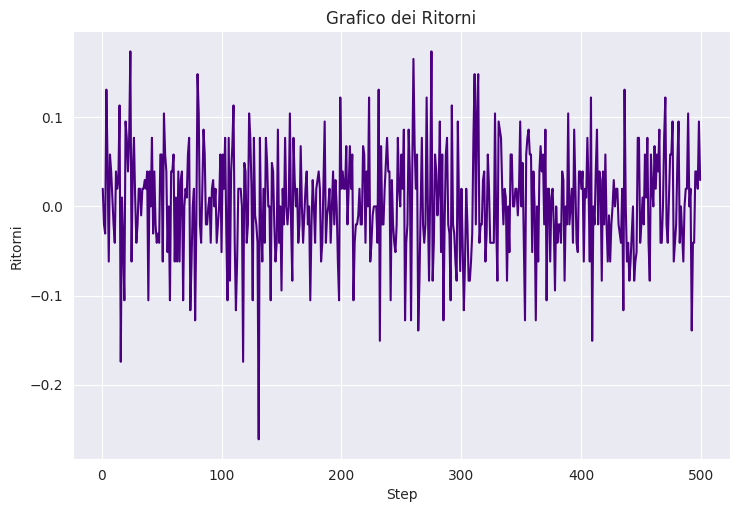

In [21]:
sns.relplot(
    data = s_ret, kind = "line",
    height = 5, aspect = 1.5, color = "indigo"
)
plt.title('Grafico dei Ritorni')
plt.ylabel('Ritorni')
plt.xlabel('Step');

### 3.6 Real Market Returns

In [80]:
import yfinance as yf

In [81]:
ticker = ['BTC-USD']
data = yf.download(ticker, start = '2017-01-01', end = '2017-12-01', period = 'max').reset_index(drop=True)

[*********************100%***********************]  1 of 1 completed


In [82]:
data = data['Close'].drop(columns = ['Date'], axis = 1)

In [83]:
print(data)

0        998.325012
1       1021.750000
2       1043.839966
3       1154.729980
4       1013.380005
           ...     
329     9330.549805
330     9818.349609
331    10058.799805
332     9888.610352
333    10233.599609
Name: Close, Length: 334, dtype: float64


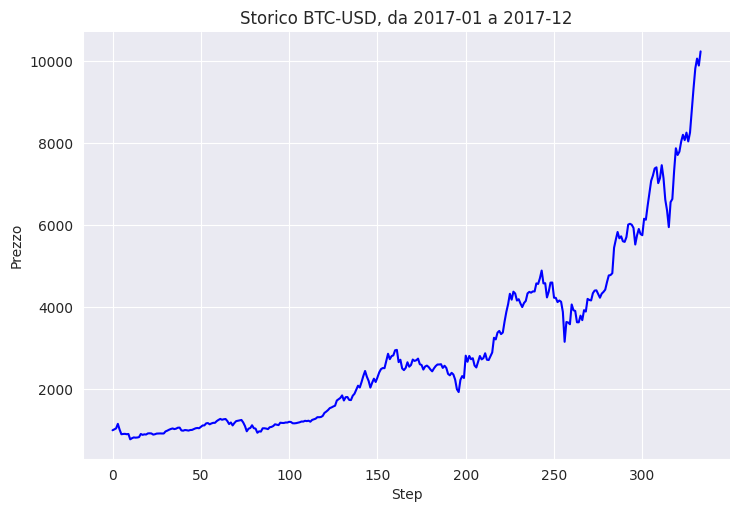

In [84]:
sns.relplot(
    data = data, kind = "line",
    height = 5, aspect = 1.5, color = "blue"
)
plt.title('Storico BTC-USD, da 2017-01 a 2017-12')
plt.ylabel('Prezzo')
plt.xlabel('Step');

In [85]:
r_ret = np.log(data / data.shift(1)).dropna()

In [86]:
print(r_ret)

1      0.023193
2      0.021389
3      0.100960
4     -0.130575
5     -0.116209
         ...   
329    0.059575
330    0.050959
331    0.024195
332   -0.017064
333    0.034293
Name: Close, Length: 333, dtype: float64


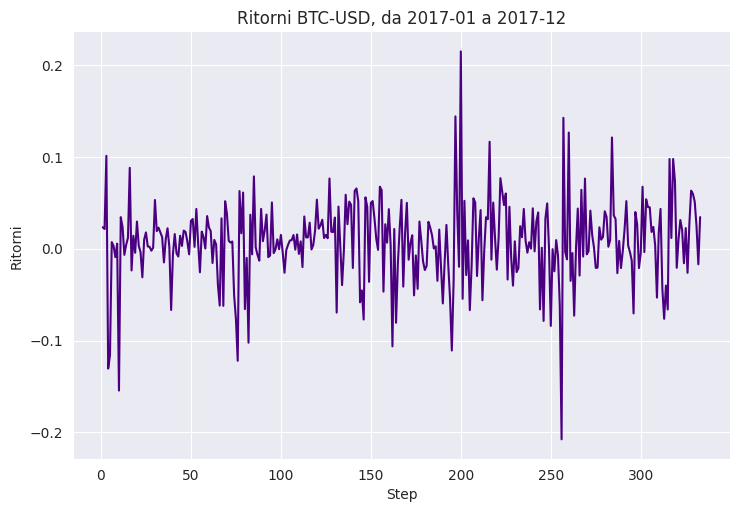

In [87]:
sns.relplot(
    data = r_ret, kind = "line",
    height = 5, aspect = 1.5, color = "indigo"
)
plt.title('Ritorni BTC-USD, da 2017-01 a 2017-12')
plt.ylabel('Ritorni')
plt.xlabel('Step');

### 3.7 Plot simulation results over real market
For both dataframes the step value is simply in the index column.

In [88]:
display(data.index)
display(model_vars.index)

RangeIndex(start=0, stop=334, step=1)

RangeIndex(start=0, stop=500, step=1)

Since simulation price is not what we are interested but in simulated returns, we have to choose a point where to start in the real market, take it's close price in that moment, and apply simulated returns to get a sort of predicted movement.

In [89]:
display(len(s_ret))
display(len(r_ret))

499

333

In [90]:
# consider a starting index in the real market
start = 15

# get the price at that index
print(data.values[start])
Price = data.values[start]

831.5339965820312


In [91]:
r_ret = np.log(data / data.shift(1))

pred_prices = list()

for n in range(start):
    pred_prices.append(np.nan)

for ret in s_ret:
    pred_prices.append(np.exp(ret) * Price)
    Price = pred_prices[-1]

In [92]:
print(pred_prices[0:20])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 848.1646765136719, 831.2013829833985, 806.2653414938965, 919.1424893030419, 965.099613768194]


In [94]:
true_prices = data.tolist()

In [96]:
df = pd.DataFrame(data = zip(true_prices, pred_prices), columns = ['true', 'pred'])

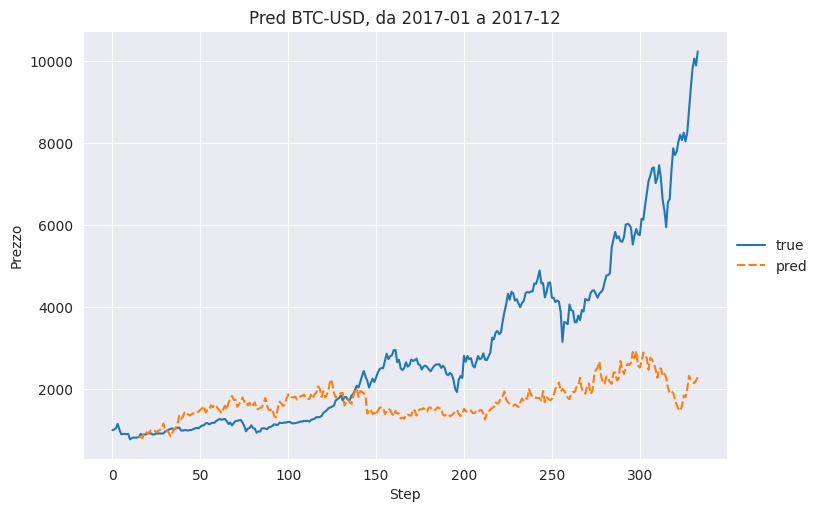

In [97]:
sns.relplot(
    data = df, kind = "line",
    height = 5, aspect = 1.5, color = "orange"
)
plt.title('Pred BTC-USD, da 2017-01 a 2017-12')
plt.ylabel('Prezzo')
plt.xlabel('Step');